# Graph Analysis - Handson and use cases

###    Marketing Analytics 
Graphs can be used to figure out the most influential people in a Social Network. Advertisers and Marketers can estimate the biggest bang for the marketing buck by routing their message through the most influential people in a Social Network
###    Banking Transactions 
Graphs can be used to find unusual patterns helping in mitigating Fraudulent transactions. There have been examples where Terrorist activity has been detected by analyzing the flow of money across interconnected Banking networks
###    Supply Chain 
Graphs help in identifying optimum routes for your delivery trucks and in identifying locations for warehouses and delivery centres
###    Pharma 
Pharma companies can optimize the routes of the salesman using Graph theory. This helps in cutting costs and reducing the travel time for salesman
###    Telecom 
Telecom companies typically use Graphs (Voronoi diagrams) to understand the quantity and location of Cell towers to ensure maximum coverage


In [2]:
!pip install PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
# !pip install python-louvain
# !pip3 install --upgrade networkx

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
import networkx as nx


In [6]:
# create a new empty graph
G = nx.Graph()

In [7]:
# add some nodes in the graph G
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)

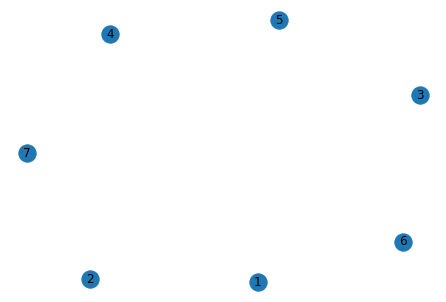

In [8]:
nx.draw(G,with_labels=1) #with labels can be 0 or 1

In [9]:
# list of all nodes added
print(G.nodes())

[1, 2, 3, 4, 5, 6, 7]


In [10]:
# add edges between nodes
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(1, 6)
G.add_edge(1, 4)
G.add_edge(3, 5)
G.add_edge(4, 6)

In [11]:
# list the edges
print(G.edges())

[(1, 2), (1, 6), (1, 4), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6)]


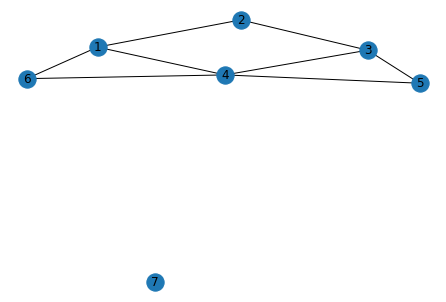

In [12]:
# draw the graph G
nx.draw(G, with_labels=1)

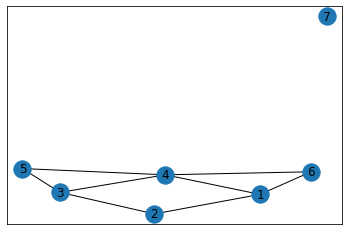

In [13]:
nx.draw_networkx(G)

# Layouts 

In [10]:
pos = nx.circular_layout(G)

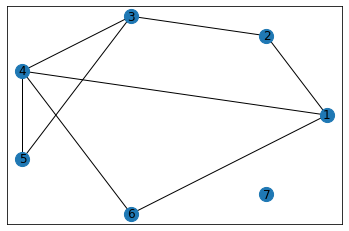

In [11]:
nx.draw_networkx(G, pos = pos, with_labels = True, node_size = 200)

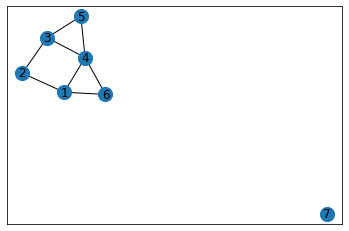

In [12]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos = pos, with_labels = True, node_size = 200)

In [ ]:
# Possible layouts :
#     "bipartite_layout",
#     "circular_layout",
#     "kamada_kawai_layout",
#     "random_layout",
#     "rescale_layout",
#     "rescale_layout_dict",
#     "shell_layout",
#     "spring_layout",
#     "spectral_layout",
#     "planar_layout",
#     "fruchterman_reingold_layout",
#     "spiral_layout",
#     "multipartite_layout",

# Cliques:
In the mathematical area of graph theory, a clique is a subset of vertices of an undirected graph such that every two distinct vertices in the clique are adjacent; that is, its induced subgraph is complete.

In [20]:
cliques = list(nx.find_cliques(G))

In [21]:
cliques

[[2, 1], [2, 3], [4, 1, 6], [4, 3, 5], [7]]

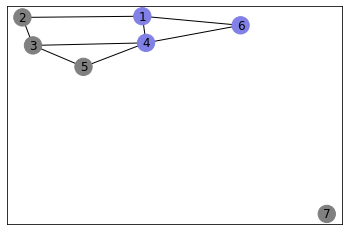

In [22]:
max_clique = max(cliques, key=len)
node_color = [(0.5, 0.5, 0.5) for v in G.nodes()]
for i, v in enumerate(G.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
nx.draw_networkx(G, node_color=node_color)

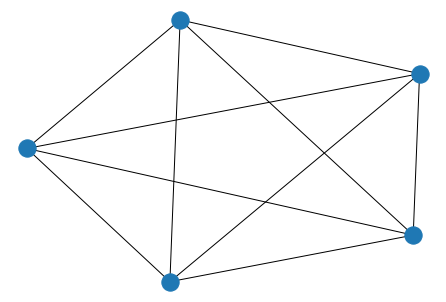

In [23]:
CG = nx.complete_graph(5) #example of clique
nx.draw(CG)

In [14]:
import community

In [15]:
downloaded = drive.CreateFile({'id':"1upH-cTLby7DBhZv7F1obQP4TGd7pnIUI"})  
downloaded.GetContentFile('facebook_combined.txt') 

In [16]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [17]:
G_fb.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [31]:
G_fb.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (0, 50), (0, 51), (0, 52), (0, 53), (0, 54), (0, 55), (0, 56), (0, 57), (0, 58), (0, 59), (0, 60), (0, 61), (0, 62), (0, 63), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 71), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110)

In [32]:
print(nx.info(G_fb))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [33]:
spring_pos = nx.spring_layout(G_fb)

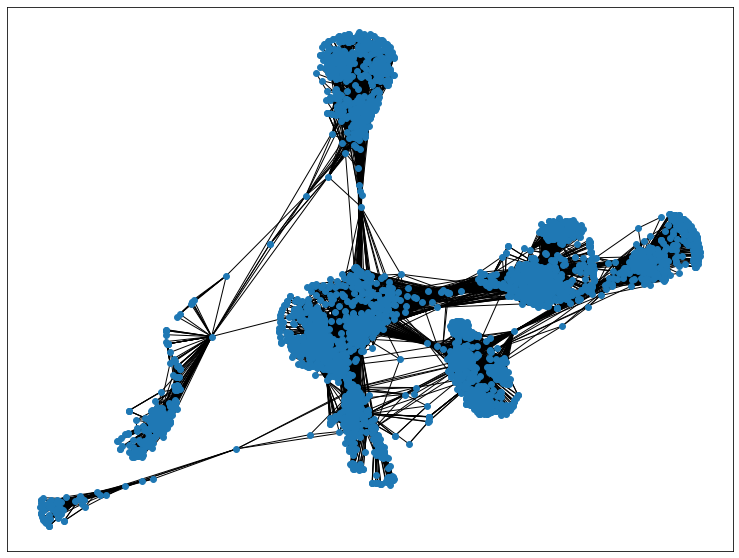

In [34]:
plt.figure(figsize=(13,10))

nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35)

# Centrality
In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. Applications include identifying the most influential person in a social network, key infrastructure nodes in the Internet or urban networks, and super-spreaders of disease.

# Degree Centrality:
The number of links incident upon a node (i.e., the number of ties that a node has)

In [35]:
dc = nx.degree_centrality(G_fb)
top = 10

max_nodes =  sorted(dc.items(), key = lambda v: -v[1])[:top]
dc_values = [5]*len(G_fb.nodes())
dc_colors = [0]*len(G_fb.nodes())
for node_deg in max_nodes:
    max_key=list(G_fb.nodes()).index(node_deg[0])
    dc_values[max_key] = 150
    dc_colors[max_key] = 2

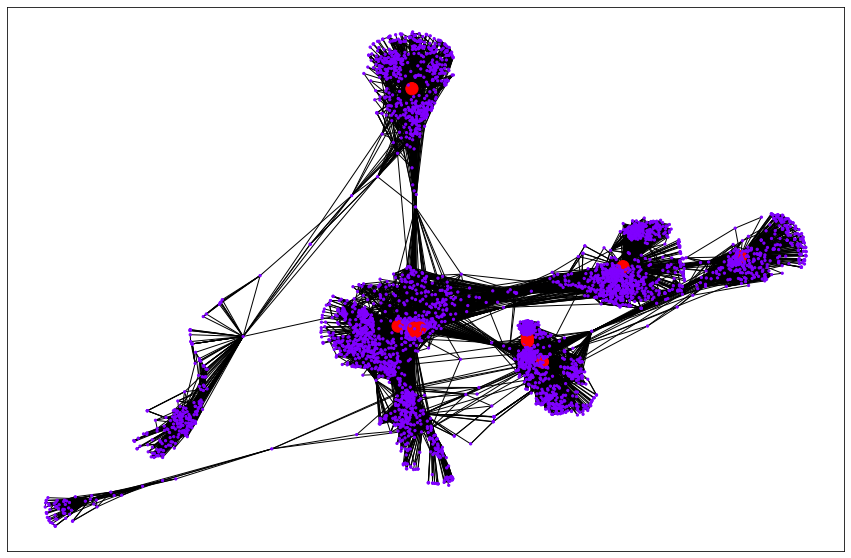

In [36]:
plt.figure(figsize=(15,10))

nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = dc_colors, node_size = dc_values, with_labels = False)

# Betweenness centrality:
It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes

In [ ]:
bc = nx.betweenness_centrality(G_fb)
top = 10

max_nodes =  sorted(bc.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())
for node_deg in max_nodes:
    max_key=list(G_fb.nodes()).index(node_deg[0])
    bt_values[max_key] = 150
    bt_colors[max_key] = 2

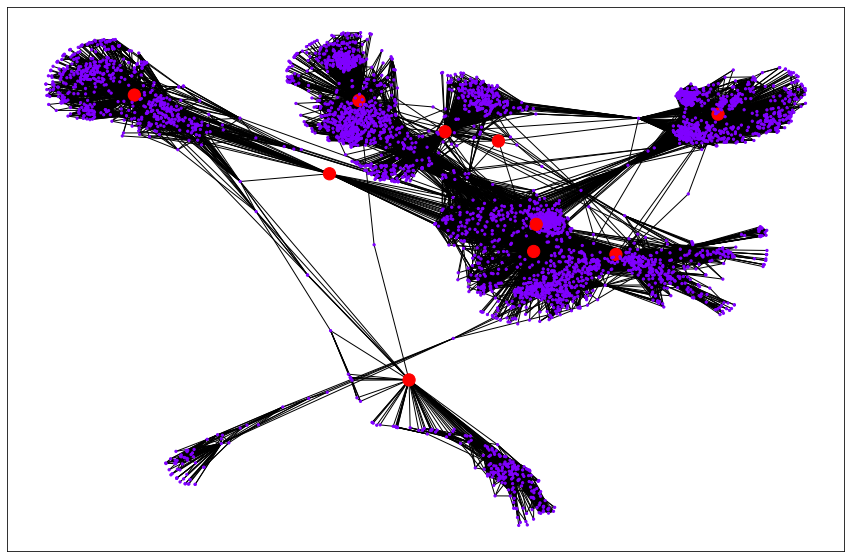

In [ ]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

# Community Detection:
In the study of complex networks, a network is said to have community structure if the nodes of the network can be easily grouped into sets of nodes such that each set of nodes is densely connected internally

In [37]:
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

In [38]:
parts

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 1,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 2,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [39]:
pd.Series(values).value_counts()

4     554
7     548
2     446
1     432
3     423
0     350
5     323
9     237
13    226
12    206
6     117
8      73
11     60
10     25
14     19
dtype: int64

In [40]:
print('number of communities:',len(pd.Series(values).value_counts()))

number of communities: 15


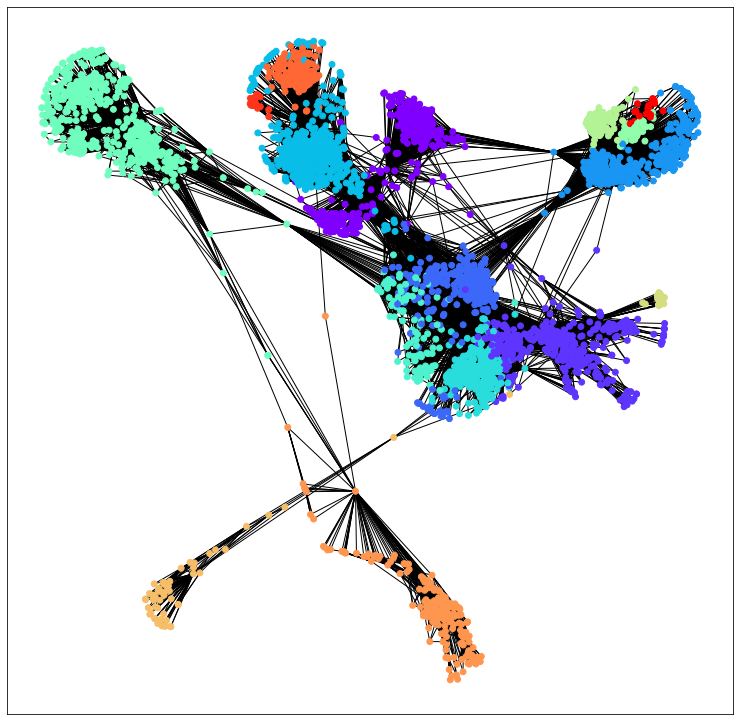

In [ ]:
plt.figure(figsize=(13,13))
nx.draw_networkx(G_fb, pos = spring_pos,  cmap = plt.get_cmap("rainbow"),node_color = values,
                 node_size = 35, with_labels = False)

# Graph Use Case: Analysing the graph of Network Scientists (Co-Authorship)
We now look at how metrics based on graph properties can be used to determine the Network Worth of Individuals using an example graph of network scientists. This data can be downloaded from https://github.com/gephi/gephi/wiki/Datasets along with many other graph data sets for you to explore 

In [18]:
downloaded = drive.CreateFile({'id':"12ogjOXQmRl7K3Yia-23L0hQuiekut-Io"})  
downloaded.GetContentFile('netscience.gml') 

In [19]:
mygraph = nx.read_gml("netscience.gml")

In [43]:
print('Nodes:',len(mygraph.nodes()),'Edges: ',len(mygraph.edges()))

Nodes: 1589 Edges:  2742


In [ ]:
spring_pos = nx.spring_layout(mygraph)

In [ ]:
list(mygraph.edges())

[('ABRAMSON, G', 'KUPERMAN, M'),
 ('ABRAMSON, G', 'MORELLI, L'),
 ('KUPERMAN, M', 'ZANETTE, D'),
 ('KUPERMAN, M', 'MORELLI, L'),
 ('ACEBRON, J', 'BONILLA, L'),
 ('ACEBRON, J', 'PEREZVICENTE, C'),
 ('ACEBRON, J', 'RITORT, F'),
 ('ACEBRON, J', 'SPIGLER, R'),
 ('BONILLA, L', 'PEREZVICENTE, C'),
 ('BONILLA, L', 'RITORT, F'),
 ('BONILLA, L', 'SPIGLER, R'),
 ('PEREZVICENTE, C', 'RITORT, F'),
 ('PEREZVICENTE, C', 'SPIGLER, R'),
 ('RITORT, F', 'SPIGLER, R'),
 ('ADAMIC, L', 'ADAR, E'),
 ('ADAMIC, L', 'HUBERMAN, B'),
 ('ADAMIC, L', 'LUKOSE, R'),
 ('ADAMIC, L', 'PUNIYANI, A'),
 ('HUBERMAN, B', 'LUKOSE, R'),
 ('HUBERMAN, B', 'PUNIYANI, A'),
 ('HUBERMAN, B', 'TYLER, J'),
 ('HUBERMAN, B', 'WILKINSON, D'),
 ('HUBERMAN, B', 'WU, F'),
 ('LUKOSE, R', 'PUNIYANI, A'),
 ('AERTSEN, A', 'GERSTEIN, G'),
 ('AERTSEN, A', 'HABIB, M'),
 ('AERTSEN, A', 'PALM, G'),
 ('AERTSEN, A', 'MEHRING, C'),
 ('AERTSEN, A', 'HEHL, U'),
 ('AERTSEN, A', 'KUBO, M'),
 ('AERTSEN, A', 'DIESMANN, M'),
 ('GERSTEIN, G', 'HABIB, M'),
 ('

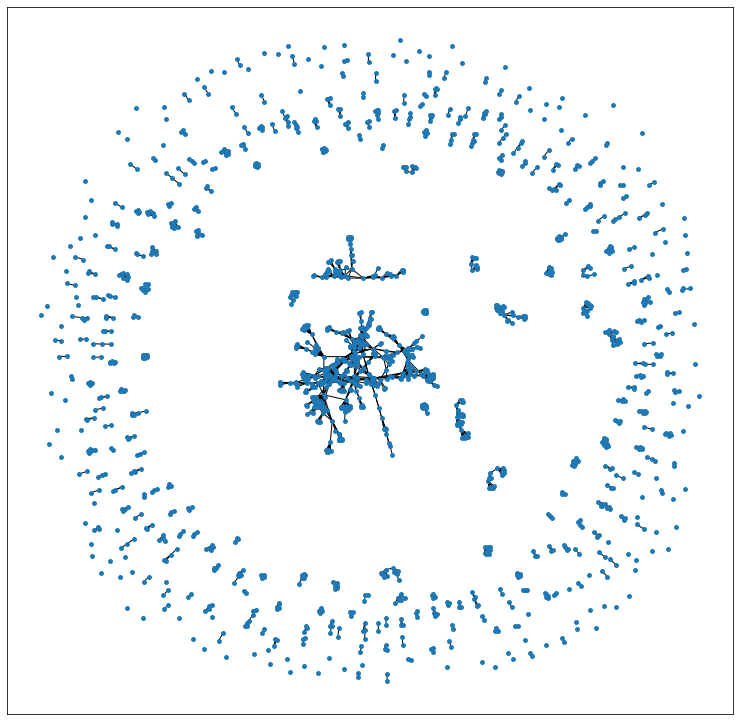

In [ ]:
plt.figure(figsize=(13,13))
nx.draw_networkx(mygraph, pos = spring_pos,cmap = plt.get_cmap("rainbow"), with_labels = False, node_size = 15)

In [ ]:
bc = nx.betweenness_centrality(mygraph)
top = 10

max_nodes =  sorted(bc.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(mygraph.nodes())
bt_colors = [0]*len(mygraph.nodes())
for node_deg in max_nodes:
    max_key=list(mygraph.nodes()).index(node_deg[0])
    bt_values[max_key] = 150
    bt_colors[max_key] = 2

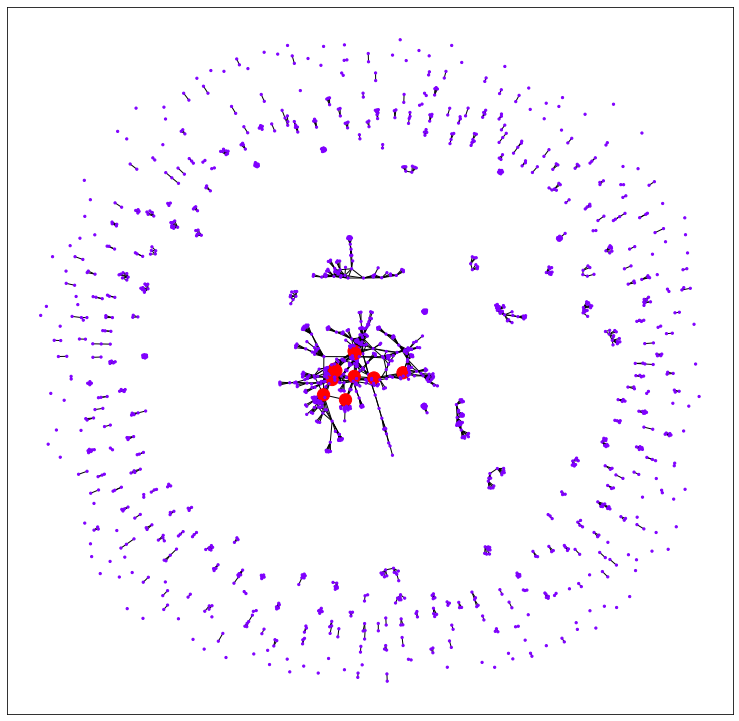

In [ ]:
plt.figure(figsize=(13,13))
nx.draw_networkx(mygraph, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

In [ ]:
list(mygraph.nodes())

['ABRAMSON, G',
 'KUPERMAN, M',
 'ACEBRON, J',
 'BONILLA, L',
 'PEREZVICENTE, C',
 'RITORT, F',
 'SPIGLER, R',
 'ADAMIC, L',
 'ADAR, E',
 'HUBERMAN, B',
 'LUKOSE, R',
 'PUNIYANI, A',
 'AERTSEN, A',
 'GERSTEIN, G',
 'HABIB, M',
 'PALM, G',
 'AFRAIMOVICH, V',
 'VERICHEV, N',
 'RABINOVICH, M',
 'AGRAWAL, H',
 'AHUJA, R',
 'MAGNANTI, T',
 'ORLIN, J',
 'AIELLO, W',
 'CHUNG, F',
 'LU, L',
 'ALBA, R',
 'ALBERICH, R',
 'MIROJULIA, J',
 'ROSSELLO, F',
 'ALBERT, R',
 'ALBERT, I',
 'NAKARADO, G',
 'BARABASI, A',
 'JEONG, H',
 'ALBERTS, B',
 'BRAY, D',
 'LEWIS, J',
 'RAFF, M',
 'ROBERTS, K',
 'WATSON, J',
 'ALDANA, M',
 'ALDOUS, D',
 'PITTEL, B',
 'ALEKSIEJUK, A',
 'HOLYST, J',
 'STAUFFER, D',
 'ALLARIA, E',
 'ARECCHI, F',
 'DIGARBO, A',
 'MEUCCI, R',
 'ALMAAS, E',
 'KOVACS, B',
 'VICSEK, T',
 'OLTVAI, Z',
 'KRAPIVSKY, P',
 'REDNER, S',
 'KULKARNI, R',
 'STROUD, D',
 'ALON, N',
 'YUSTER, R',
 'ZWICK, U',
 'ALON, U',
 'SURETTE, M',
 'BARKAI, N',
 'LEIBER, S',
 'ALTER, O',
 'BROWN, P',
 'BOTSTEIN, D

In [ ]:
max_nodes #max between ness centrality

[('NEWMAN, M', 0.022459375113458798),
 ('PASTORSATORRAS, R', 0.019516861381626158),
 ('MORENO, Y', 0.01617343211214779),
 ('SOLE, R', 0.015276756135266724),
 ('BOCCALETTI, S', 0.014443550319900836),
 ('JEONG, H', 0.014172140544325236),
 ('HOLME, P', 0.013099217887592772),
 ('CALDARELLI, G', 0.012527805884243034),
 ('BIANCONI, G', 0.009888736450975174),
 ('CAPOCCI, A', 0.00987789056154081)]

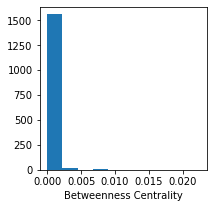

In [ ]:
bet_cent = list(nx.betweenness_centrality(mygraph).values())
plt.figure(figsize=(3,3))

plt.hist(bet_cent)
plt.xlabel("Betweenness Centrality")
plt.show()

In [ ]:
# bt

In [ ]:
dc = nx.degree_centrality(mygraph)
top = 10
mynodes = list(mygraph.nodes())
max_nodes =  sorted(dc.items(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(mygraph.nodes())
bt_colors = [0]*len(mygraph.nodes())
for node_deg in max_nodes:
    max_key=mynodes.index(node_deg[0])
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 


In [ ]:
max_nodes # top 10 degree centrality

[('BARABASI, A', 0.021410579345088162),
 ('JEONG, H', 0.017002518891687655),
 ('NEWMAN, M', 0.017002518891687655),
 ('OLTVAI, Z', 0.01322418136020151),
 ('YOUNG, M', 0.012594458438287152),
 ('UETZ, P', 0.012594458438287152),
 ('CAGNEY, G', 0.012594458438287152),
 ('MANSFIELD, T', 0.012594458438287152),
 ('ALON, U', 0.011964735516372796),
 ('BOCCALETTI, S', 0.011964735516372796)]

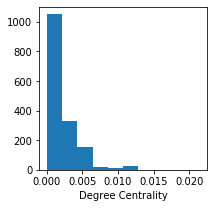

In [ ]:
plt.figure(figsize=(3,3))
deg_cent = list(nx.degree_centrality(mygraph).values())
plt.hist(deg_cent)
plt.xlabel("Degree Centrality")
plt.show()

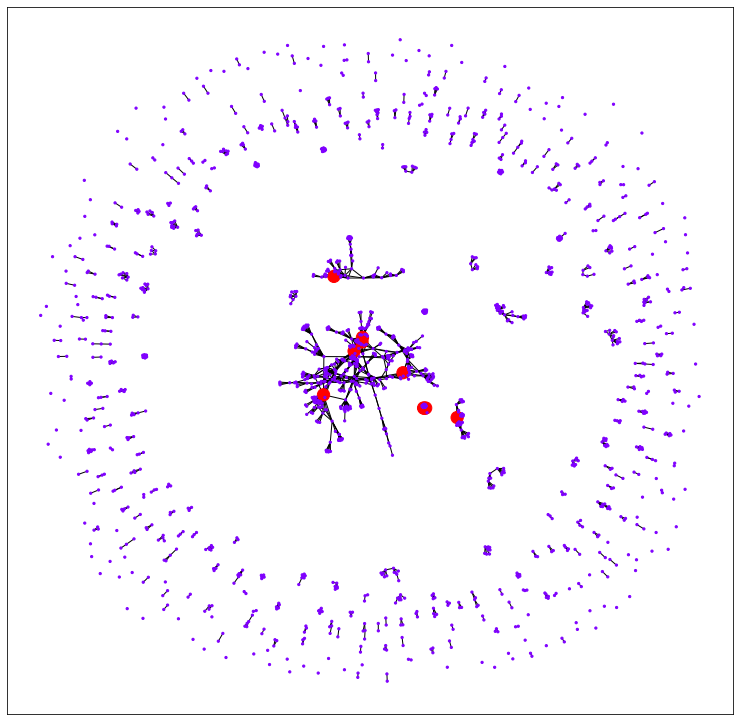

In [ ]:
plt.figure(figsize=(13,13))

nx.draw_networkx(mygraph, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

In [ ]:
# import community as community_louvain

In [ ]:
parts = community.best_partition(mygraph)
values = [parts.get(node) for node in mygraph.nodes()]

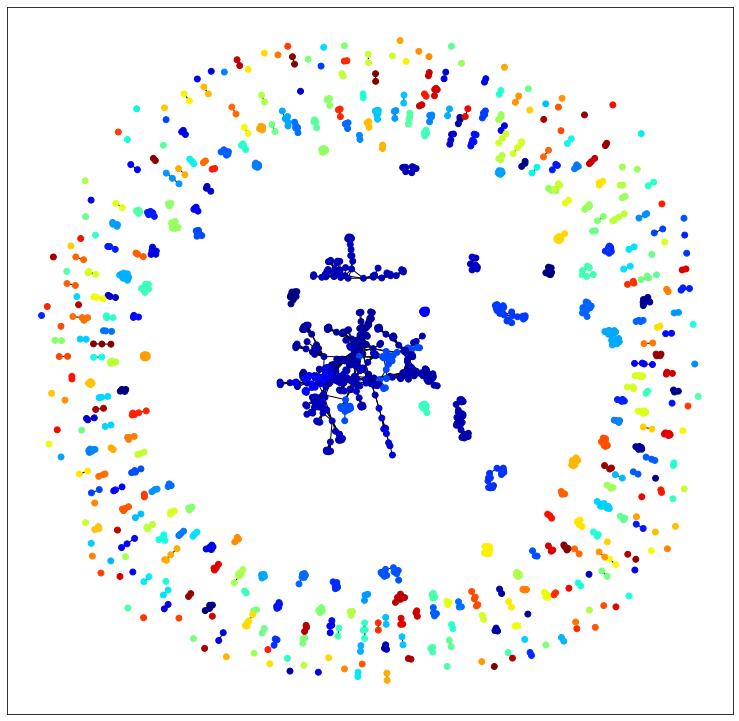

In [ ]:
plt.figure(figsize=(13,13))
nx.draw_networkx(mygraph, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

In [ ]:
# pd.Series(values).value_counts()

In [ ]:
print('number of communities:',len(pd.Series(values).value_counts()))

number of communities: 405


In [ ]:
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
prs = pagerank(mygraph)

In [ ]:
prs

{'ABRAMSON, G': 0.000664512128613361,
 'KUPERMAN, M': 0.0009912941741631383,
 'ACEBRON, J': 0.0006755843804891232,
 'BONILLA, L': 0.0006755843804891232,
 'PEREZVICENTE, C': 0.0006755843804891232,
 'RITORT, F': 0.0006755843804891232,
 'SPIGLER, R': 0.0006755843804891231,
 'ADAMIC, L': 0.000955927636971912,
 'ADAR, E': 0.00030446879772183825,
 'HUBERMAN, B': 0.0013995633832172545,
 'LUKOSE, R': 0.0007014964879918052,
 'PUNIYANI, A': 0.0007014964879918052,
 'AERTSEN, A': 0.0011271346396453134,
 'GERSTEIN, G': 0.0005497262929166763,
 'HABIB, M': 0.0005497262929166763,
 'PALM, G': 0.0005497262929166763,
 'AFRAIMOVICH, V': 0.0006755843804891232,
 'VERICHEV, N': 0.0006755843804891232,
 'RABINOVICH, M': 0.0006755843804891231,
 'AGRAWAL, H': 0.00010133765707336848,
 'AHUJA, R': 0.0006755843804891232,
 'MAGNANTI, T': 0.0006755843804891232,
 'ORLIN, J': 0.0006755843804891231,
 'AIELLO, W': 0.00042526317236626845,
 'CHUNG, F': 0.0009528744335987783,
 'LU, L': 0.0009528744335987783,
 'ALBA, R': 0.0

In [ ]:
{k: v for k, v in sorted(prs.items(), key=lambda item: item[1], reverse=True)}

{'NEWMAN, M': 0.004138295123698456,
 'BARABASI, A': 0.0037175514035569096,
 'JEONG, H': 0.00275816093123197,
 'SOLE, R': 0.0023560861401242007,
 'YOUNG, M': 0.002341429283880207,
 'BOCCALETTI, S': 0.002276704573999912,
 'OLTVAI, Z': 0.00213524371776521,
 'DIAZGUILERA, A': 0.0019670966279729594,
 'PASTORSATORRAS, R': 0.0019583103882127345,
 'STAUFFER, D': 0.001940654677512906,
 'KURTHS, J': 0.0018942906319601804,
 'MORENO, Y': 0.0018322293737549763,
 'VESPIGNANI, A': 0.0017907629853923025,
 'HU, G': 0.00176821299005301,
 'VICSEK, T': 0.0017357890345603287,
 'ALON, U': 0.0017257262377261377,
 'KAHNG, B': 0.0017128775744274477,
 'CALDARELLI, G': 0.0017126345727549912,
 'LATORA, V': 0.0017046236814916916,
 'HOLME, P': 0.0016646042633125476,
 'AMARAL, L': 0.0016513479244652347,
 'ROY, R': 0.0016457069450594459,
 'KOCH, C': 0.0016307684260828382,
 'BARTHELEMY, M': 0.0016077151594114498,
 'VAZQUEZ, A': 0.0016005797444944678,
 'KERTESZ, J': 0.001553252461893495,
 'BORNHOLDT, S': 0.001486715404

# Keyphrase Analysis

In [51]:
from os import listdir
from os.path import isfile, join
def read_data(mypath):
    from collections import defaultdict 
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    d_cnt = defaultdict(int)
    data = []
    for f in onlyfiles:
        with open(mypath+f) as fptr:
            tags = []
            for line in fptr:
                newval = line.rstrip().lower()
                tags.append(newval)
                d_cnt[newval] = d_cnt[newval]+1
            data.append(tags)
            
    # remove tags that appear just once
    item_cnt =0
    final_set = set()
    for item,cnt in d_cnt.items():
        if cnt <= 1:
            item_cnt = item_cnt +1
        else:
            final_set.add(item)
            
    final_data = []
    for data_l in data:
        this_list=[]
        for item in data_l:
            if item in final_set:
                this_list.append(item)
        final_data.append(this_list)
        
    return final_data

In [52]:
downloaded = drive.CreateFile({'id':"1xT-QQ6xihVnexBtqmmlD_1cv9Z8AXz4a"}) 


In [54]:
downloaded

GoogleDriveFile({'id': '1xT-QQ6xihVnexBtqmmlD_1cv9Z8AXz4a'})

In [1]:
mypath = "SemEval2010/keys/" #/tags data/"
data = read_data(mypath)
data = data[:30]

In [ ]:
data

[['mechanism design',
  'auction',
  'competitive analysis',
  'benchmark',
  'bound',
  'preference',
  'distribution'],
 ['ranking',
  'pagerank',
  'mean average precision',
  'feature selection',
  'rank',
  'hit',
  'map'],
 ['auction', 'agent', 'game theory'],
 ['mean average precision', 'pagerank', 'hit', 'stemming'],
 ['indexing scheme', 'indexing scheme'],
 ['multiagent system'],
 [],
 ['bdi'],
 ['dominant strategy', 'mechanism design', 'strategyproof'],
 ['multiagent system',
  'self-interested agent',
  'game theory',
  'nash equilibrium',
  'dominance',
  'strategy',
  'bayesian game',
  'dominance'],
 ['vickrey-clarke-grove',
  'distributed environment',
  'cooperation',
  'peer-to-peer',
  'agent'],
 ['multiagent system',
  'resource',
  'markov decision process',
  'resource allocation',
  'scheduling',
  'utility function',
  'optimal allocation'],
 ['network', 'nash equilibrium', 'graph topology', 'game theory'],
 ['machine learning technique', 'machine learn'],
 ['mea

In [ ]:
len(data)

30

In [ ]:
# Create Unique set of keyphrases
s = set()
for d in data[:30]:
    s=s.union(d)
len(s)

88

In [ ]:
# Build Graph
G = nx.Graph()
G.add_nodes_from(s)
G.nodes()

NodeView(('pagerank', 'mechanism design', 'utility function', 'dominant strategy', 'intelligent agent', 'bound', 'game theory', 'cooperation', 'document retrieval', 'stemming', 'implicit relevance feedback', 'prediction market', 'map', 'scheduling', 'support vector machine', 'topic tracking', 'resource allocation', 'human factor', 'information retrieval system', 'nash equilibrium', 'auction', 'markov decision process', 'learning technique', 'proxy', 'bdi', 'cluster', 'spherical scoring rule', 'measurement', 'vickrey-clarke-grove', 'indexing scheme', 'ranking', 'rank', 'feature selection', 'web search', 'competitive analysis', 'graph topology', 'multiagent system', 'optimal allocation', 'preference aggregation', 'communication', 'strategy', 'information retrieval', 'dpm', 'protocol', 'strategyproof', 'bayesian game', 'approximation algorithm', 'pervasive computing', 'document', 'sensor network', 'datum fusion', 'social network', 'cycle monotonicity', 'negotiation', 'machine learning', '

In [ ]:
#Count unique edges and their weights (co-occurance)
import itertools as it
from collections import defaultdict 
my_edges = defaultdict(int)
for d in data:
    for pair in it.product(d, repeat=2):
        if (pair[0] != pair[1]):
            my_edges[pair] += 1

In [ ]:
list(it.product(['a','b','c'],repeat=2))

[('a', 'a'),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'a'),
 ('b', 'b'),
 ('b', 'c'),
 ('c', 'a'),
 ('c', 'b'),
 ('c', 'c')]

In [ ]:
my_edges

defaultdict(int,
            {('mechanism design', 'auction'): 1,
             ('mechanism design', 'competitive analysis'): 1,
             ('mechanism design', 'benchmark'): 1,
             ('mechanism design', 'bound'): 1,
             ('mechanism design', 'preference'): 1,
             ('mechanism design', 'distribution'): 1,
             ('auction', 'mechanism design'): 1,
             ('auction', 'competitive analysis'): 1,
             ('auction', 'benchmark'): 1,
             ('auction', 'bound'): 1,
             ('auction', 'preference'): 1,
             ('auction', 'distribution'): 1,
             ('competitive analysis', 'mechanism design'): 1,
             ('competitive analysis', 'auction'): 1,
             ('competitive analysis', 'benchmark'): 1,
             ('competitive analysis', 'bound'): 1,
             ('competitive analysis', 'preference'): 1,
             ('competitive analysis', 'distribution'): 1,
             ('benchmark', 'mechanism design'): 1,
            

In [ ]:
# Add edges
for e,w in my_edges.items():
    G.add_edge(*e)
    G.edges[e]['weight']=w

In [ ]:
G.edges()

EdgeView([('pagerank', 'ranking'), ('pagerank', 'mean average precision'), ('pagerank', 'feature selection'), ('pagerank', 'rank'), ('pagerank', 'hit'), ('pagerank', 'map'), ('pagerank', 'stemming'), ('mechanism design', 'auction'), ('mechanism design', 'competitive analysis'), ('mechanism design', 'benchmark'), ('mechanism design', 'bound'), ('mechanism design', 'preference'), ('mechanism design', 'distribution'), ('mechanism design', 'dominant strategy'), ('mechanism design', 'strategyproof'), ('mechanism design', 'approximation algorithm'), ('mechanism design', 'scheduling'), ('mechanism design', 'cycle monotonicity'), ('mechanism design', 'algorithm'), ('mechanism design', 'schedule'), ('utility function', 'multiagent system'), ('utility function', 'resource'), ('utility function', 'markov decision process'), ('utility function', 'resource allocation'), ('utility function', 'scheduling'), ('utility function', 'optimal allocation'), ('dominant strategy', 'strategyproof'), ('intellig

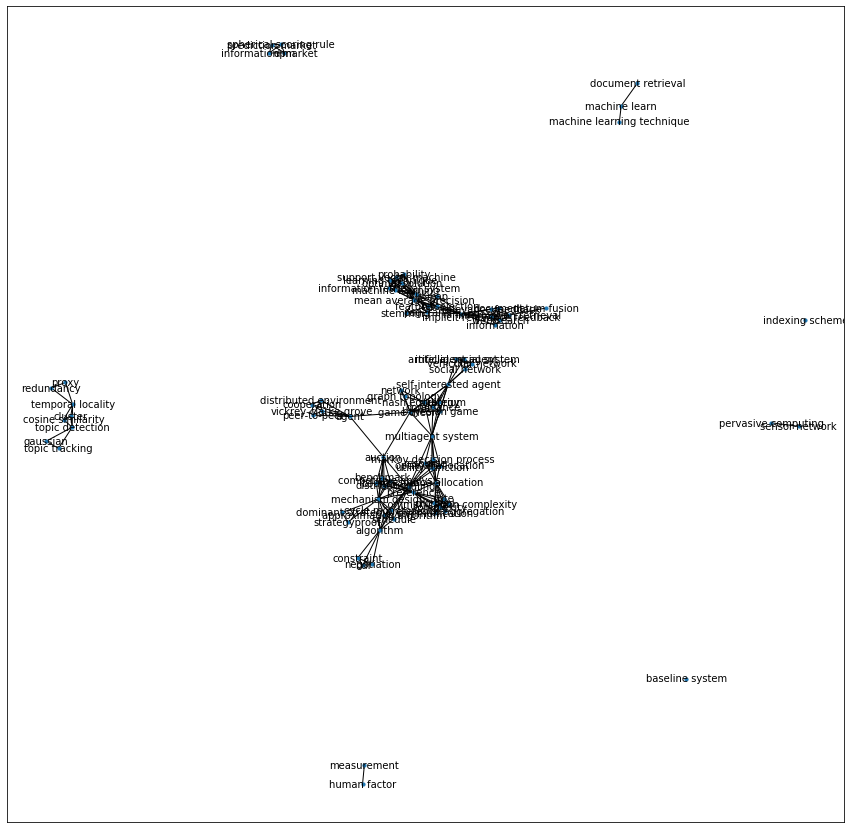

In [ ]:
plt.figure(figsize=(15,15))
nx.draw_networkx(G,with_labels=True,node_size=10,font_size=10)


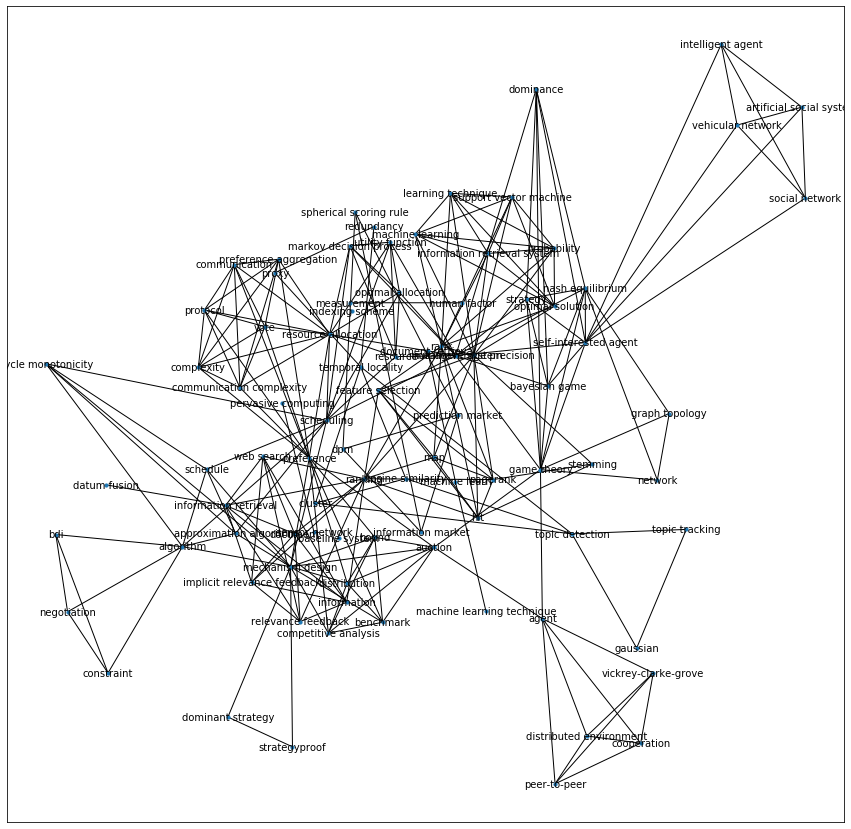

In [ ]:
pos=nx.kamada_kawai_layout(G)
plt.figure(figsize=(15,15))
nx.draw_networkx(G,with_labels=True,node_size=10,font_size=10,pos=pos)


In [ ]:
# Page Rank for identifying most important keyphrases
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
prs = pagerank(G)
{k: v for k, v in sorted(prs.items(), key=lambda item: item[1], reverse=True)}

{'mechanism design': 0.02323434055304795,
 'topic detection': 0.022692692683526316,
 'self-interested agent': 0.022319373785303808,
 'mean average precision': 0.02219257423786042,
 'preference': 0.01935617881061333,
 'resource allocation': 0.018691016176026545,
 'ranking': 0.018576551742172254,
 'multiagent system': 0.01840497486292742,
 'game theory': 0.018368349189886134,
 'rank': 0.018139568915265934,
 'scheduling': 0.018086527537535434,
 'temporal locality': 0.01774229269237121,
 'dominance': 0.016940659015837006,
 'machine learn': 0.016928750255773575,
 'algorithm': 0.016482550892840488,
 'cycle monotonicity': 0.015980983858099998,
 'nash equilibrium': 0.015173549902022989,
 'spherical scoring rule': 0.015043402248379086,
 'information retrieval': 0.01363815992117687,
 'auction': 0.013262928661630943,
 'pagerank': 0.01325190669246536,
 'hit': 0.013251906692465358,
 'agent': 0.012764332201262038,
 'human factor': 0.011587485515643108,
 'measurement': 0.011587485515643108,
 'pervasi

# Quick discussion about using Knowledge graphs to improve search results and enrichment of data